2024-05-20 Testing model by one layer.

Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa

Target shape: (120,)
Features shape: (120, 5)

Train on 76 samples, validate on 20 samples
Epoch 1/100
76/76 [==============================] - 0s 2ms/step - loss: 32.3187 - accuracy: 0.5658 - val_loss: 43.0286 - val_accuracy: 0.3000
Epoch 2/100
76/76 [==============================] - 0s 806us/step - loss: 23.6569 - accuracy: 0.5132 - val_loss: 31.2762 - val_accuracy: 0.3500
Epoch 3/100
76/76 [==============================] - 0s 819us/step - loss: 17.4468 - accuracy: 0.5395 - val_loss: 22.6488 - val_accuracy: 0.3500
Epoch 4/100
76/76 [==============================] - 0s 933us/step - loss: 12.8429 - accuracy: 0.5921 - val_loss: 16.3018 - val_accuracy: 0.3500
Epoch 5/100
76/76 [==============================] - 0s 905us/step - loss: 9.1409 - accuracy: 0.5658 - val_loss: 11.5922 - val_accuracy: 0.3000
Epoch 6/100
76/76 [==============================] - 0s 933us/step - loss: 6.0228 - accuracy: 0.5132 - val_loss: 6.9405 - val_accuracy: 0.3000
Epoch 7/100
76/76 [=========================

Epoch 56/100
76/76 [==============================] - 0s 636us/step - loss: 0.2107 - accuracy: 0.9079 - val_loss: 0.4140 - val_accuracy: 0.8500
Epoch 57/100
76/76 [==============================] - 0s 586us/step - loss: 0.1873 - accuracy: 0.9342 - val_loss: 0.3965 - val_accuracy: 0.8000
Epoch 58/100
76/76 [==============================] - 0s 661us/step - loss: 0.1910 - accuracy: 0.9211 - val_loss: 0.4020 - val_accuracy: 0.8500
Epoch 59/100
76/76 [==============================] - 0s 753us/step - loss: 0.1782 - accuracy: 0.9211 - val_loss: 0.4407 - val_accuracy: 0.8000
Epoch 60/100
76/76 [==============================] - 0s 1ms/step - loss: 0.1947 - accuracy: 0.9211 - val_loss: 0.4837 - val_accuracy: 0.8000
Epoch 61/100
76/76 [==============================] - 0s 970us/step - loss: 0.1861 - accuracy: 0.9211 - val_loss: 0.4562 - val_accuracy: 0.8000
Epoch 62/100
76/76 [==============================] - 0s 1ms/step - loss: 0.1901 - accuracy: 0.9079 - val_loss: 0.3930 - val_accuracy: 0.8

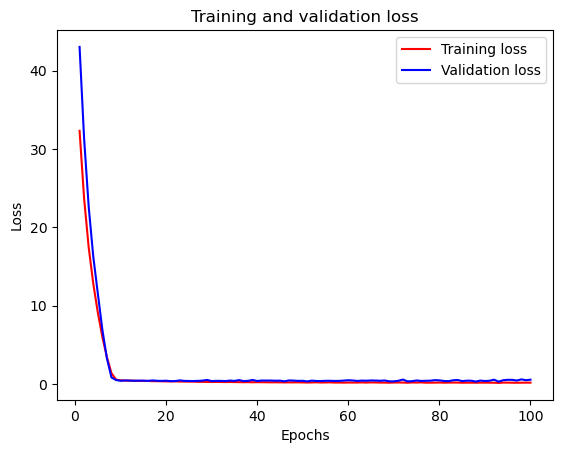

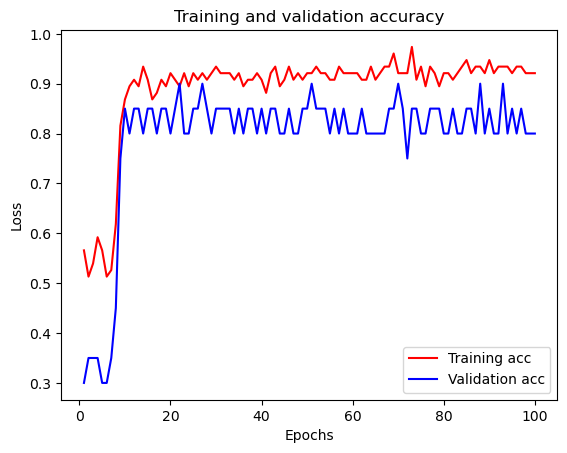

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras import models
from keras import layers

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Display the first few rows to ensure it's loaded correctly
#print(df.head())
#print(df.info())

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Verify the shapes to ensure they are correct
print("Target shape:", target.shape)
print("Features shape:", features.shape)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(6, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(5,activation='relu'))
model.add(layers.Dense(y_train_encoded.shape[1], activation='softmax'))

# Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
val_epochs = 100
# Train the model
history = model.fit(x_train, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")

# Optional: Make predictions
predictions = model.predict(x_test)
print("Predictions shape:", predictions.shape)

history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs+1))
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()